In [3]:
import numpy as np
import pandas as pd
import requests
import cfbd
from cfbd.rest import ApiException
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.DataFrame()

In [5]:
# # Configure API key authorization: ApiKeyAuth
# configuration = cfbd.Configuration()
# configuration.api_key['Authorization'] = '+eiRK37qNRqjoDcgyigTAWo4QyGrMtYR1o/hifwQmzj8hO1OwzwDdbjRnJKfSr2t'
# configuration.api_key_prefix['Authorization'] = 'Bearer'

# for year in range (2023, 2025):
#     api_config = cfbd.ApiClient(configuration)
#     for week in range (1,16):
#         response = plays = cfbd.PlaysApi(api_config).get_plays(year=year, week=week)
#         data = (pd.DataFrame.from_records([p.to_dict() for p in plays]))
#         dataset = pd.concat([dataset, data]) 
          
      
# dataset

In [6]:
df = pd.read_csv('cfb2023TeamOff.csv')
df

,Rk,School,G,Pts,PassCmp,PassAtt,PassPct,PassYds,PassTD,RushAtt,...,TOAvg,FDPass,FDRush,FDPen,FDTot,PENNo.,PENYds,Fum,Int,Tot
0,1,LSU,13,45.5,22.0,31.6,69.6,338.9,3.4,33.1,...,8.4,14.0,9.8,2.0,25.8,6.1,51.7,0.2,0.4,0.6
1,2,Oregon,14,44.2,28.4,36.7,77.2,346.9,3.5,31.2,...,7.8,15.1,9.9,1.6,26.6,6.6,60.6,0.1,0.4,0.5
2,3,USC,13,41.8,24.2,35.5,68.1,333.0,2.8,27.8,...,7.4,14.1,6.8,1.8,22.6,7.5,68.4,0.8,0.5,1.3
3,4,Oklahoma,13,41.7,23.8,34.8,68.4,324.8,2.6,40.1,...,6.8,13.4,10.0,2.2,25.5,6.8,58.5,0.8,0.7,1.5
4,5,Georgia,14,40.1,23.4,32.6,71.8,305.3,2.1,35.8,...,7.3,13.8,10.6,1.6,25.9,4.4,43.3,0.5,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Nevada,12,17.3,15.9,28.8,55.4,175.2,0.5,36.9,...,4.6,7.0,7.2,2.5,16.7,6.8,58.5,0.7,1.0,1.7
129,130,Akron,12,16.3,21.5,35.4,60.7,197.6,0.8,28.8,...,4.3,8.1,7.1,1.5,16.7,6.9,60.1,0.5,1.3,1.8
130,131,Michigan State,12,15.9,18.4,31.6,58.3,199.8,1.2,30.8,...,4.6,8.6,6.2,1.8,16.6,7.0,60.7,0.8,1.1,1.8
131,132,Iowa,14,15.4,12.1,24.9,48.9,118.6,0.6,34.7,...,3.9,5.4,5.9,1.6,12.9,3.6,30.9,0.8,0.8,1.6


In [7]:
bigtenteams = ['Michigan', 'Ohio State', 'Penn State','Maryland','Rutgers','Michigan State','Indiana','Iowa','Northwestern','Wisconsin','Minnesota','Nebraska','Illinois','Purdue']

In [8]:
bigten_df = df[df['School'].isin(bigtenteams)]
bigten_df

,Rk,School,G,Pts,PassCmp,PassAtt,PassPct,PassYds,PassTD,RushAtt,...,TOAvg,FDPass,FDRush,FDPen,FDTot,PENNo.,PENYds,Fum,Int,Tot
11,12,Penn State,13,36.2,18.9,31.8,59.6,215.0,2.3,39.6,...,5.6,10.3,10.5,1.7,22.5,5.0,43.3,0.5,0.2,0.6
13,14,Michigan,15,35.9,17.3,24.1,72.0,213.7,1.6,37.5,...,6.2,10.6,8.1,1.2,19.9,3.0,27.5,0.2,0.3,0.5
45,46,Ohio State,13,30.5,19.6,30.8,63.8,269.1,2.0,33.2,...,6.4,12.4,7.0,1.8,21.2,5.7,44.5,0.5,0.5,1.0
52,53,Maryland,13,29.7,23.6,36.7,64.4,278.9,2.1,29.3,...,5.9,12.0,7.2,1.8,21.0,5.5,56.5,0.6,1.0,1.6
82,83,Illinois,12,24.5,21.8,34.6,62.9,264.6,1.9,33.0,...,5.8,12.3,6.4,1.7,20.4,6.6,62.4,0.8,1.1,1.9
86,87,Purdue,12,23.9,19.5,32.7,59.7,211.2,1.3,38.5,...,5.3,9.8,8.9,1.8,20.5,6.0,56.3,0.7,0.8,1.5
92,93,Wisconsin,13,23.5,21.6,36.1,59.9,220.2,1.1,34.9,...,5.4,10.2,8.7,1.2,20.1,5.6,48.1,0.9,0.4,1.3
97,98,Rutgers,13,23.2,10.9,22.6,48.3,137.5,0.8,39.8,...,4.9,6.5,9.7,1.3,17.5,5.1,45.2,0.4,0.6,1.0
104,105,Indiana,12,22.2,17.9,30.6,58.6,212.8,1.5,36.1,...,5.0,10.2,7.4,2.2,19.8,5.4,50.6,0.7,0.8,1.5
105,106,Northwestern,13,22.1,18.5,29.9,62.0,202.0,1.5,35.2,...,4.7,8.9,6.5,1.5,16.9,5.3,42.6,0.1,0.6,0.7


In [9]:
bigten_df.columns

Index(['Rk', 'School', 'G', 'Pts', 'PassCmp', 'PassAtt', 'PassPct', 'PassYds',
       'PassTD', 'RushAtt', 'RushYds', 'RushAvg', 'RushTD', 'TOPlays', 'TOYds',
       'TOAvg', 'FDPass', 'FDRush', 'FDPen', 'FDTot', 'PENNo.', 'PENYds',
       'Fum', 'Int', 'Tot'],
      dtype='object')

In [10]:
bt_rush = bigten_df[['School', 'Pts','RushAtt', 'RushYds', 'RushAvg', 'RushTD']]
bt_rush


,School,Pts,RushAtt,RushYds,RushAvg,RushTD
11,Penn State,36.2,39.6,184.8,4.7,2.0
13,Michigan,35.9,37.5,169.1,4.5,2.7
45,Ohio State,30.5,33.2,138.8,4.2,1.5
52,Maryland,29.7,29.3,108.4,3.7,1.5
82,Illinois,24.5,33.0,126.4,3.8,1.0
86,Purdue,23.9,38.5,169.1,4.4,1.7
92,Wisconsin,23.5,34.9,161.0,4.6,1.7
97,Rutgers,23.2,39.8,168.7,4.2,1.8
104,Indiana,22.2,36.1,120.1,3.3,1.1
105,Northwestern,22.1,35.2,101.9,2.9,1.1


In [11]:
rks_df = df = pd.read_csv('cfb2023Rnks.csv')
rks_df

,Rk,School,Conf,AP Rank,W,L,OSRS,DSRS,SRS,Off,Def,Off.1,Def.1,Off.2,Def.2,Off.3,Def.3
0,1,Michigan,Big Ten (East),1.0,15,0,8.54,16.47,25.01,55.90,-6.17,11.00,4.11,6.16,1.82,8.03,2.98
1,2,Texas,Big 12,3.0,12,2,9.43,10.89,20.32,54.22,-1.30,10.51,4.94,6.21,1.64,8.18,3.57
2,3,Ohio State,Big Ten (East),10.0,11,2,4.03,16.22,20.26,49.00,-6.57,10.77,3.31,5.64,2.16,8.07,2.71
3,4,Georgia,SEC (East),4.0,13,1,8.62,11.38,20.00,57.41,-2.05,11.31,3.61,6.60,2.40,8.78,3.11
4,5,Oregon,Pac-12,6.0,12,2,8.10,11.84,19.94,59.12,-1.83,11.35,4.08,7.03,2.60,9.29,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Temple,American,NaN,3,9,-7.69,-6.71,-14.40,31.94,22.02,7.69,7.73,4.37,3.64,6.31,5.25
129,130,Florida International,CUSA,NaN,4,8,-8.30,-7.00,-15.30,29.97,20.92,8.52,6.27,3.31,3.94,5.89,4.97
130,131,Nevada,MWC,NaN,2,10,-12.84,-2.96,-15.80,26.59,18.58,7.24,7.14,4.04,4.39,5.43,5.57
131,132,Akron,MAC (East),NaN,2,10,-11.87,-6.77,-18.64,26.33,20.57,6.37,6.18,3.64,3.38,5.14,4.65


In [12]:
bigten_rks = rks_df[rks_df['School'].isin(bigtenteams)]
bigten_rks

,Rk,School,Conf,AP Rank,W,L,OSRS,DSRS,SRS,Off,Def,Off.1,Def.1,Off.2,Def.2,Off.3,Def.3
0,1,Michigan,Big Ten (East),1.0,15,0,8.54,16.47,25.01,55.90,-6.17,11.00,4.11,6.16,1.82,8.03,2.98
2,3,Ohio State,Big Ten (East),10.0,11,2,4.03,16.22,20.26,49.00,-6.57,10.77,3.31,5.64,2.16,8.07,2.71
5,6,Penn State,Big Ten (East),13.0,10,3,5.21,13.02,18.23,54.23,-2.48,8.73,4.74,6.10,1.23,7.25,2.81
20,21,Maryland,Big Ten (East),NaN,8,5,7.04,2.70,9.74,48.52,7.85,9.64,5.01,5.19,2.37,7.60,3.69
39,40,Iowa,Big Ten (West),24.0,10,4,-7.03,13.30,6.26,33.30,-2.03,6.71,3.49,4.88,1.76,5.60,2.69
42,43,Wisconsin,Big Ten (West),NaN,7,6,-0.34,6.16,5.82,40.62,4.13,8.10,4.95,5.96,2.68,6.96,3.75
44,45,Rutgers,Big Ten (East),NaN,7,6,0.51,4.42,4.93,42.67,5.42,8.10,4.62,5.90,2.94,6.72,3.70
54,55,Northwestern,Big Ten (West),NaN,8,5,0.66,1.87,2.53,40.86,8.99,8.90,5.54,4.40,2.81,6.41,4.02
59,60,Nebraska,Big Ten (West),NaN,5,7,-5.92,7.98,2.06,34.81,3.22,8.22,4.68,5.78,2.02,6.68,3.41
70,71,Minnesota,Big Ten (West),NaN,6,7,-0.42,0.42,-0.01,39.63,12.08,8.01,5.84,5.67,3.54,6.56,4.73


In [13]:
bt_rks = bigten_rks[['School', 'W','L']]
bt_rks

,School,W,L
0,Michigan,15,0
2,Ohio State,11,2
5,Penn State,10,3
20,Maryland,8,5
39,Iowa,10,4
42,Wisconsin,7,6
44,Rutgers,7,6
54,Northwestern,8,5
59,Nebraska,5,7
70,Minnesota,6,7


In [14]:
bt_df = pd.merge(bt_rush, bt_rks, on='School', how='inner')
bt_df = bt_df.sort_values(by=['RushYds'], ascending=False)
bt_df

,School,Pts,RushAtt,RushYds,RushAvg,RushTD,W,L
0,Penn State,36.2,39.6,184.8,4.7,2.0,10,3
11,Nebraska,18.0,39.8,176.8,4.4,1.3,5,7
1,Michigan,35.9,37.5,169.1,4.5,2.7,15,0
5,Purdue,23.9,38.5,169.1,4.4,1.7,4,8
7,Rutgers,23.2,39.8,168.7,4.2,1.8,7,6
6,Wisconsin,23.5,34.9,161.0,4.6,1.7,7,6
10,Minnesota,20.9,38.8,157.5,4.1,1.0,6,7
2,Ohio State,30.5,33.2,138.8,4.2,1.5,11,2
4,Illinois,24.5,33.0,126.4,3.8,1.0,5,7
8,Indiana,22.2,36.1,120.1,3.3,1.1,3,9


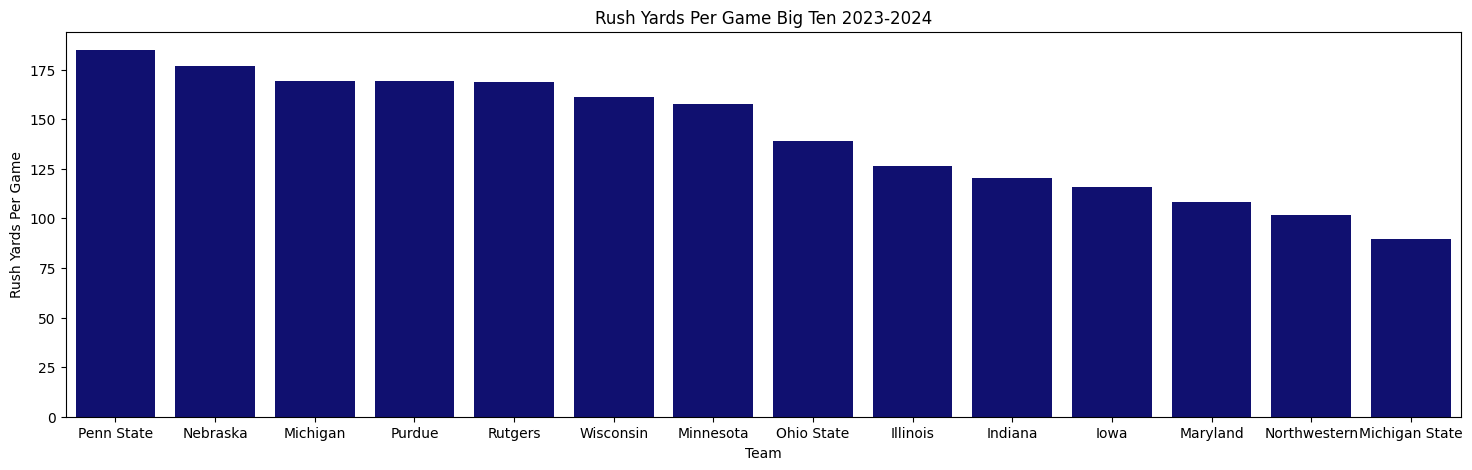

In [43]:
plt.figure(figsize=(18, 5))
sns.barplot(data=bt_df, x='School', y='RushYds', color = 'Navy')
plt.title('Rush Yards Per Game Big Ten 2023-2024')
plt.xlabel('Team')
plt.ylabel('Rush Yards Per Game')
plt.show()